<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Análisis de Datos y Estadísticas COVID-19 por países
## Autores: Claudio Sánchez Torres & Javier Astorga

# 1. Selección de API y Definición del Problema

## API Seleccionada
- **Nombre**: Disease.sh API
- **Endpoint**: `https://disease.sh/v3/covid-19/countries`
- **Tipo de datos**: Estadísticas COVID-19 por países


### Problema de Negocio
El código implementa un sistema de visualización y análisis de datos COVID-19 a nivel mundial
El objetivo es proporcionar una herramienta interactiva para analizar y comparar estadísticas de COVID-19 en diferentes niveles geográficos (global, continental y por países)
Busca facilitar la toma de decisiones mediante el análisis de métricas clave como casos totales, muertes y tasas de pruebas

### Desafíos de los Datos
Manejo de Múltiples Niveles de Agregación:

Necesidad de estructurar datos en tres niveles: global, continental y por países
Requerimiento de transformar y agregar datos para diferentes vistas
Visualización Interactiva:

Implementación de un dashboard dinámico con selector multinivel
Necesidad de mostrar diferentes tipos de gráficos según el nivel seleccionado
Procesamiento de Métricas:

Cálculo de tasas y promedios para diferentes niveles geográficos
Manejo de grandes volúmenes de datos con diferentes escalas
Generación de Informes:

Creación de reportes detallados en formato HTML
Presentación clara de estadísticas clave para cada nivel de análisis
Integración de Datos:

Combinación de diferentes métricas (casos, muertes, pruebas)
Normalización de datos para comparaciones significativas entre países

In [ ]:
# Desinstalar librerías problemáticas
%pip uninstall -y xarray albumentations bigframes imbalanced-learn mlxtend jax albucore chex pymc scikit-image jaxlib blosc2

# Reinstalar versiones específicas
%pip install numpy==1.23.5 pandas==2.2.2 scikit-learn==1.2.2 xgboost seaborn matplotlib IPython==7.34.0 pyarrow

In [ ]:
# Librerías para análisis de datos
import pandas as pd  # Manipulación de datos
import numpy as np   # Operaciones numéricas y arrays

# Otras Librerías de machine learning
from sklearn.model_selection import train_test_split, cross_val_score # División de datos y validación cruzada
from sklearn.preprocessing import StandardScaler  # Escalado de datos
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text  # Árbol de decisión y visualización
from sklearn.ensemble import RandomForestRegressor  # Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas de evaluación
import xgboost as xgb  # XGBoost para modelos avanzados

# Librerías de visualización
import seaborn as sns  # Visualizaciones estadísticas
import matplotlib.pyplot as plt  # Gráficos base

# Análisis estadístico y peticiones API
from scipy import stats  # Herramientas estadísticas
import requests  # Peticiones HTTP para API

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


In [ ]:
# 2. Extracción de Datos

### Conexión a API
def obtener_datos_covid():
    url = "https://disease.sh/v3/covid-19/countries"
    respuesta = requests.get(url)
    return respuesta.json()

# Obtener y transformar datos
datos = obtener_datos_covid()
df = pd.json_normalize(datos)

### Almacenamiento
# Guardamos en formato Parquet
df.to_parquet('datos_covid.parquet', index=False)


### Extrae datos y respaldo local

*   Extrae datos de COVID-19 de una API
*   Los transforma a un formato tabular usando pandas
*   Los almacena en un archivo CSV para su posterior uso









In [ ]:
# Verificar valores faltantes
print("Valores faltantes:\n",df.isnull().sum())


Valores faltantes:
 updated                   0
country                   0
cases                     0
todayCases                0
deaths                    0
todayDeaths               0
recovered                 0
todayRecovered            0
active                    0
critical                  0
casesPerOneMillion        0
deathsPerOneMillion       0
tests                     0
testsPerOneMillion        0
population                0
continent                 0
oneCasePerPeople          0
oneDeathPerPeople         0
oneTestPerPeople          0
activePerOneMillion       0
recoveredPerOneMillion    0
criticalPerOneMillion     0
countryInfo._id           2
countryInfo.iso2          2
countryInfo.iso3          2
countryInfo.lat           0
countryInfo.long          0
countryInfo.flag          0
dtype: int64


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()


### Limpieza de Datos
- Tratamiento de valores nulos
- Formateo de fechas
- Eliminación de duplicados

In [ ]:
# Crear nuevas características
df['tasa_mortalidad'] = (df['deaths'] / df['cases']) * 100
df['tasa_recuperacion'] = (df['recovered'] / df['cases']) * 100
df['tasa_positividad'] = (df['cases'] / df['tests']) * 100



Interpretación Gráfico 1:
El país con más casos es USA con 111,820,082 casos


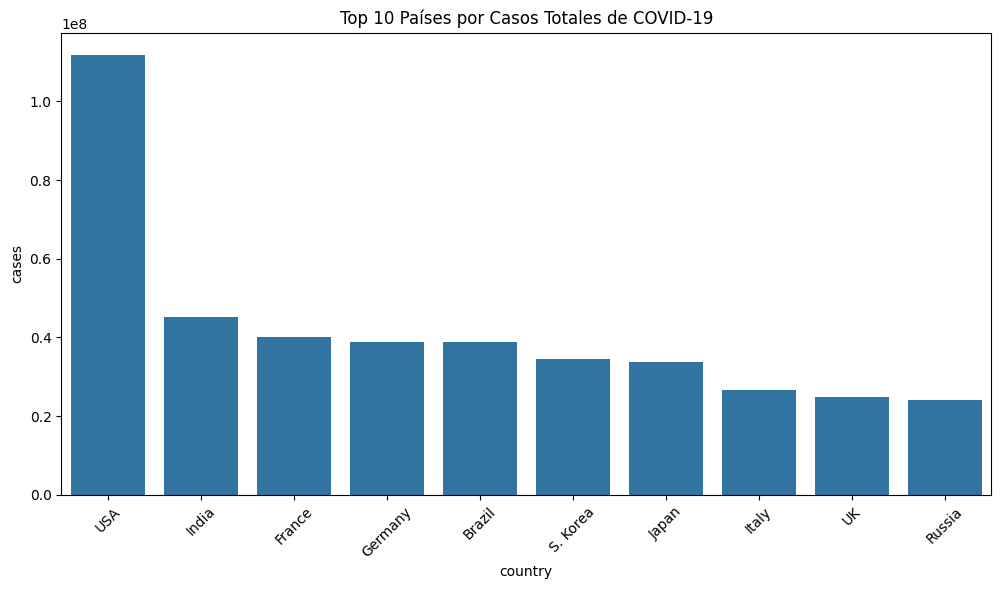

In [ ]:
# 1. Top 10 países por casos totales
plt.figure(figsize=(12, 6))
top_10_casos = df.nlargest(10, 'cases')
sns.barplot(data=top_10_casos, x='country', y='cases')
plt.xticks(rotation=45)
plt.title('Top 10 Países por Casos Totales de COVID-19')
print("\nInterpretación Gráfico 1:")
print(f"El país con más casos es {top_10_casos.iloc[0]['country']} con {top_10_casos.iloc[0]['cases']:,} casos")
plt.show()

El código está diseñado para crear una visualización clara y profesional de los datos de COVID-19, facilitando la comparación entre países y la identificación rápida de los más afectados por la pandemia.

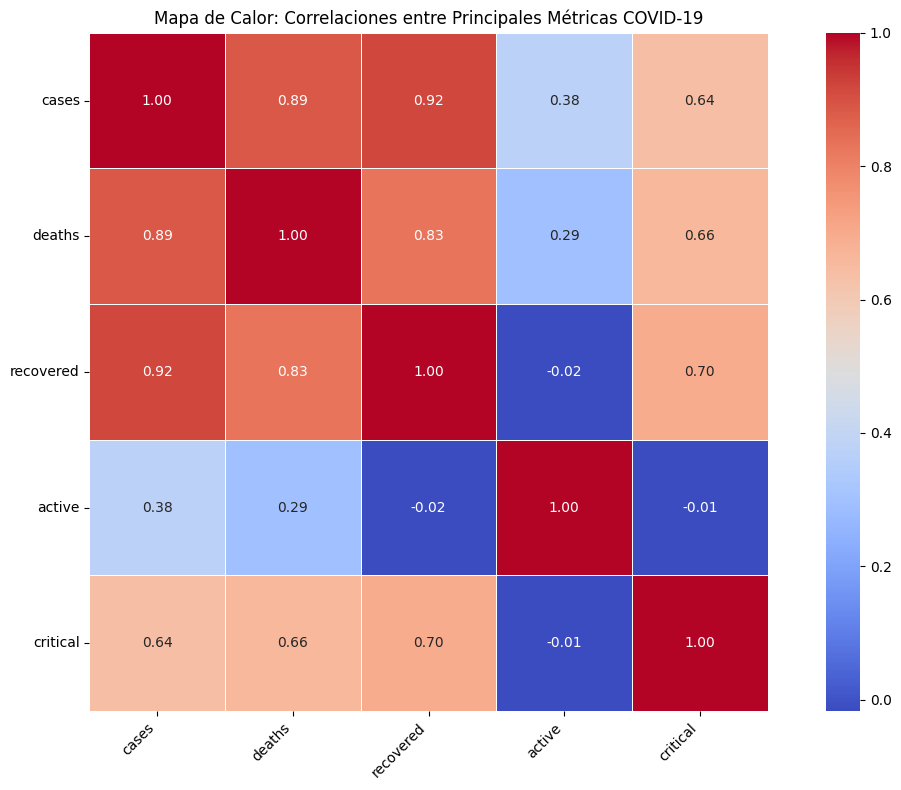

In [ ]:
# Seleccionar las 5 variables más relevantes para COVID-19
variables_relevantes = [
    'cases',
    'deaths',
    'recovered',
    'active',
    'critical'

]

# Crear matriz de correlación con las variables seleccionadas
matriz_correlacion = df[variables_relevantes].corr()

# Generar mapa de calor mejorado
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt='.2f',
            square=True)

plt.title('Mapa de Calor: Correlaciones entre Principales Métricas COVID-19')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Este visualización permite identificar rápidamente las relaciones entre las diferentes métricas de COVID-19, donde:

Valores cercanos a 1 indican correlación positiva fuerte
Valores cercanos a -1 indican correlación negativa fuerte
Valores cercanos a 0 indican poca o ninguna correlación

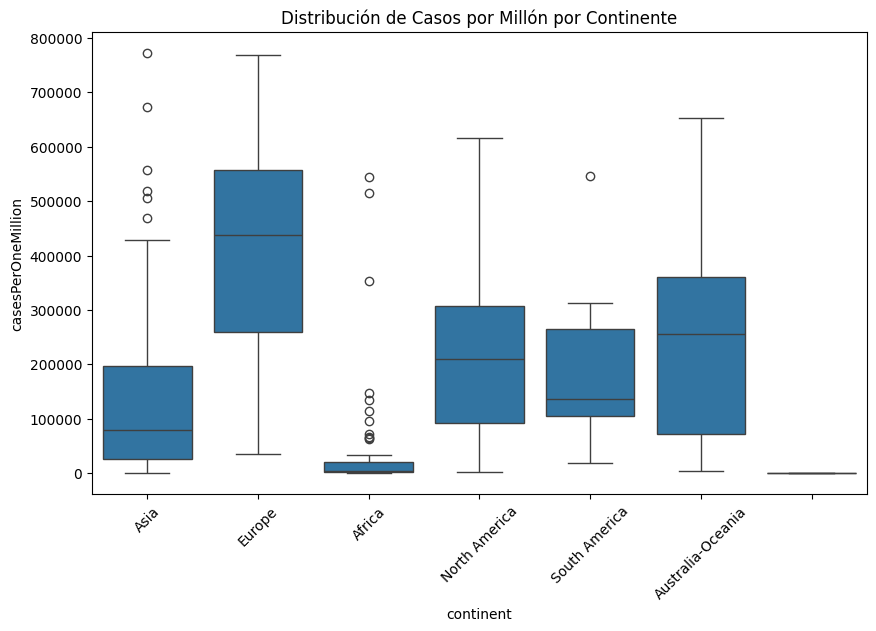

In [ ]:

# Gráfico 3: Casos por Millón por Continente
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='continent', y='casesPerOneMillion')
plt.xticks(rotation=45)
plt.title('Distribución de Casos por Millón por Continente')
plt.show()

Este gráfico permite:

Comparar la distribución de casos entre continentes
Identificar medianas y rangos
Detectar valores atípicos
Visualizar la variabilidad de casos por continente
La visualización es útil para entender cómo la pandemia afectó diferentes regiones geográficas en términos relativos a su población.

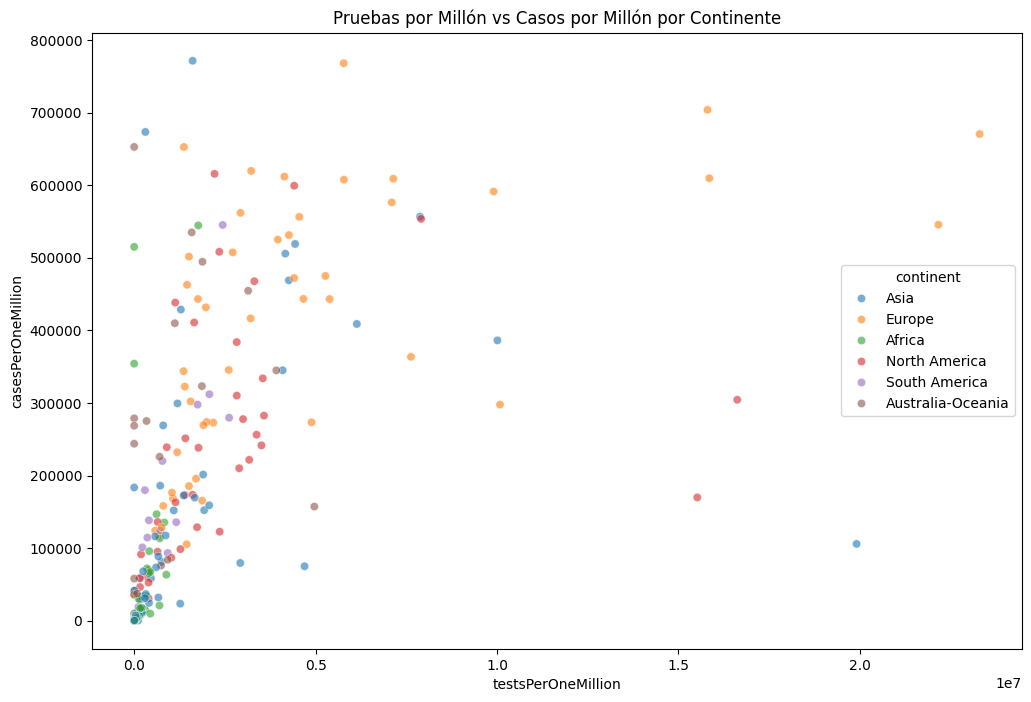

In [ ]:
# Gráfico 4: Dispersión de Pruebas vs Casos por continente
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='testsPerOneMillion', y='casesPerOneMillion',
                hue='continent', alpha=0.6)
plt.title('Pruebas por Millón vs Casos por Millón por Continente')
plt.show()

Este gráfico permite visualizar:

Correlación entre pruebas realizadas y casos detectados
Patrones específicos por continente
Identificación de clusters geográficos
Outliers o casos excepcionales


In [ ]:
# Detección de valores atípicos usando Z-score
def detectar_atipicos(df, columna):
    z_scores = stats.zscore(df[columna])
    atipicos = df[abs(z_scores) > 3]
    return atipicos

In [ ]:
# Detectar atípicos en casos
casos_atipicos = detectar_atipicos(df, 'cases')
print("\nValores atípicos en casos totales:")
print(casos_atipicos[['country', 'cases']])


Valores atípicos en casos totales:
      country      cases
26     Brazil   38743918
71     France   40138560
77    Germany   38828995
94      India   45035393
103     Japan   33803572
171  S. Korea   34571873
218       USA  111820082


Este análisis permite:

Identificar países con números de casos excepcionalmente altos
Detectar posibles hotspots de la pandemia
Encontrar países que requieren atención especial
Validar la calidad de los datos reportados
Los resultados son valiosos para:

Análisis epidemiológico
Planificación de recursos
Comparaciones internacionales
Identificación de patrones inusuales

In [ ]:
# Estadísticas resumen
print("\nEstadísticas Resumen:")
display(df.describe())


Estadísticas Resumen:


,updated,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,...,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion,countryInfo._id,countryInfo.lat,countryInfo.long,tasa_mortalidad,tasa_recuperacion,tasa_positividad
count,2.310000e+02,2.310000e+02,231.0,2.310000e+02,231.0,2.310000e+02,231.000000,2.310000e+02,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,229.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,1.737692e+12,3.050883e+06,0.0,3.034927e+04,0.0,2.426700e+06,3.567100,5.938335e+05,12.454545,201193.108225,...,9.852814,63981.512511,135973.002424,2.250606,436.318777,17.975936,12.346804,1.385414,72.910703,inf
std,8.221293e+01,1.002125e+07,0.0,1.092314e+05,0.0,9.196220e+06,34.562905,3.893881e+06,71.172396,206119.715817,...,25.827437,149135.697501,185767.240498,9.769097,250.464566,24.281405,71.828763,2.158146,40.888779,NaN
min,1.737692e+12,9.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,-51.750000,-176.200000,0.000000,0.000000,0.314564
25%,1.737692e+12,2.636600e+04,0.0,1.855000e+02,0.0,2.189500e+03,0.000000,6.750000e+01,0.000000,17656.500000,...,0.000000,21.880000,834.905000,0.000000,222.000000,2.250000,-54.000000,0.437695,55.747960,7.715090
50%,1.737692e+12,2.068970e+05,0.0,1.974000e+03,0.0,5.894700e+04,0.000000,1.283000e+03,0.000000,128681.000000,...,1.000000,449.530000,32797.450000,0.000000,438.000000,17.000000,15.500000,0.875039,97.333268,13.249228
75%,1.737692e+12,1.348198e+06,0.0,1.428700e+04,0.0,1.032544e+06,0.000000,2.775550e+04,0.000000,328620.500000,...,5.000000,12969.700000,222352.335000,0.000000,654.000000,39.000000,46.083350,1.786124,98.948370,22.952146
max,1.737692e+12,1.118201e+08,0.0,1.219487e+06,0.0,1.098144e+08,390.000000,4.450182e+07,940.000000,771655.000000,...,196.000000,703390.000000,763121.610000,100.650000,894.000000,72.000000,178.000000,22.222222,100.000000,inf


Es una herramienta muy útil para:

Obtener una visión general rápida de los datos
Identificar patrones y valores atípicos
Entender la distribución de las variables numéricas
Realizar un análisis exploratorio inicial de los datos

In [ ]:
# Preparación de datos
# Seleccionamos features relevantes para predecir casos
X = df[['population', 'testsPerOneMillion', 'deathsPerOneMillion', 'recovered']]
y = df['cases']

Es un paso fundamental para:

Entrenar modelos de predicción
Realizar análisis de regresión
Establecer relaciones entre variables
Crear modelos predictivos de casos COVID-19 basados en los indicadores seleccionados

In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Esta división es esencial para:

Evaluar el rendimiento real del modelo
Evitar el sobreajuste
Validar la capacidad de generalización
Obtener métricas de rendimiento confiables

In [ ]:
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Este escalado es fundamental porque:

Mejora el rendimiento de muchos algoritmos de ML
Hace que todas las características estén en la misma escala
Evita que variables con valores grandes dominen el modelo
Acelera la convergencia en el entrenamiento

In [ ]:

# Implementación de modelos con parámetros específicos
models = {
    'Decision Tree': DecisionTreeRegressor(
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        max_depth=6,
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
}

# Implementación de validación cruzada manual
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Entrenamiento inicial
    model.fit(X_train_scaled, y_train)

    # Predicciones en conjunto de prueba
    y_pred = model.predict(X_test_scaled)

    # Métricas de evaluación
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

    # Validación cruzada manual
    cv_scores = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_cv_train, X_cv_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_cv_train, y_cv_train)
        y_cv_pred = model.predict(X_cv_val)
        cv_scores.append(r2_score(y_cv_val, y_cv_pred))

    results[name]['CV_Score'] = np.mean(cv_scores)

# Mostrar resultados
for model_name, metrics in results.items():
    print(f"\nResultados para {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")



Resultados para Decision Tree:
MAE: 2961637.9309
RMSE: 12162759.1456
R2: 0.4555
CV_Score: 0.3079

Resultados para Random Forest:
MAE: 2440506.7738
RMSE: 11626403.9799
R2: 0.5024
CV_Score: 0.7161

Resultados para XGBoost:
MAE: 2348576.1925
RMSE: 10936197.9449
R2: 0.5597
CV_Score: 0.7311


Definición de Modelos:
Decision Tree: Árbol de decisión con profundidad máxima de 10
Random Forest: 100 árboles con profundidad máxima de 10
XGBoost: 100 estimadores con profundidad 6 y tasa de aprendizaje 0.1

Proceso de Validación:
Usa validación cruzada con 5 pliegues (KFold)
Incluye aleatorización de datos (shuffle=True)
Mantiene reproducibilidad (random_state=42)

Evaluación de Modelos: Calcula múltiples métricas:
MAE (Error Absoluto Medio)
RMSE (Raíz del Error Cuadrático Medio)
R2 (Coeficiente de Determinación)
CV_Score (Puntuación de Validación Cruzada)

Proceso de Entrenamiento:
Entrena cada modelo en datos de entrenamiento
Realiza predicciones en conjunto de prueba
Ejecuta validación cruzada manual
Almacena y muestra resultados para cada modelo
Este enfoque proporciona una evaluación robusta y completa del rendimiento de cada modelo.

<ipython-input-25-c408fb07e438>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances,


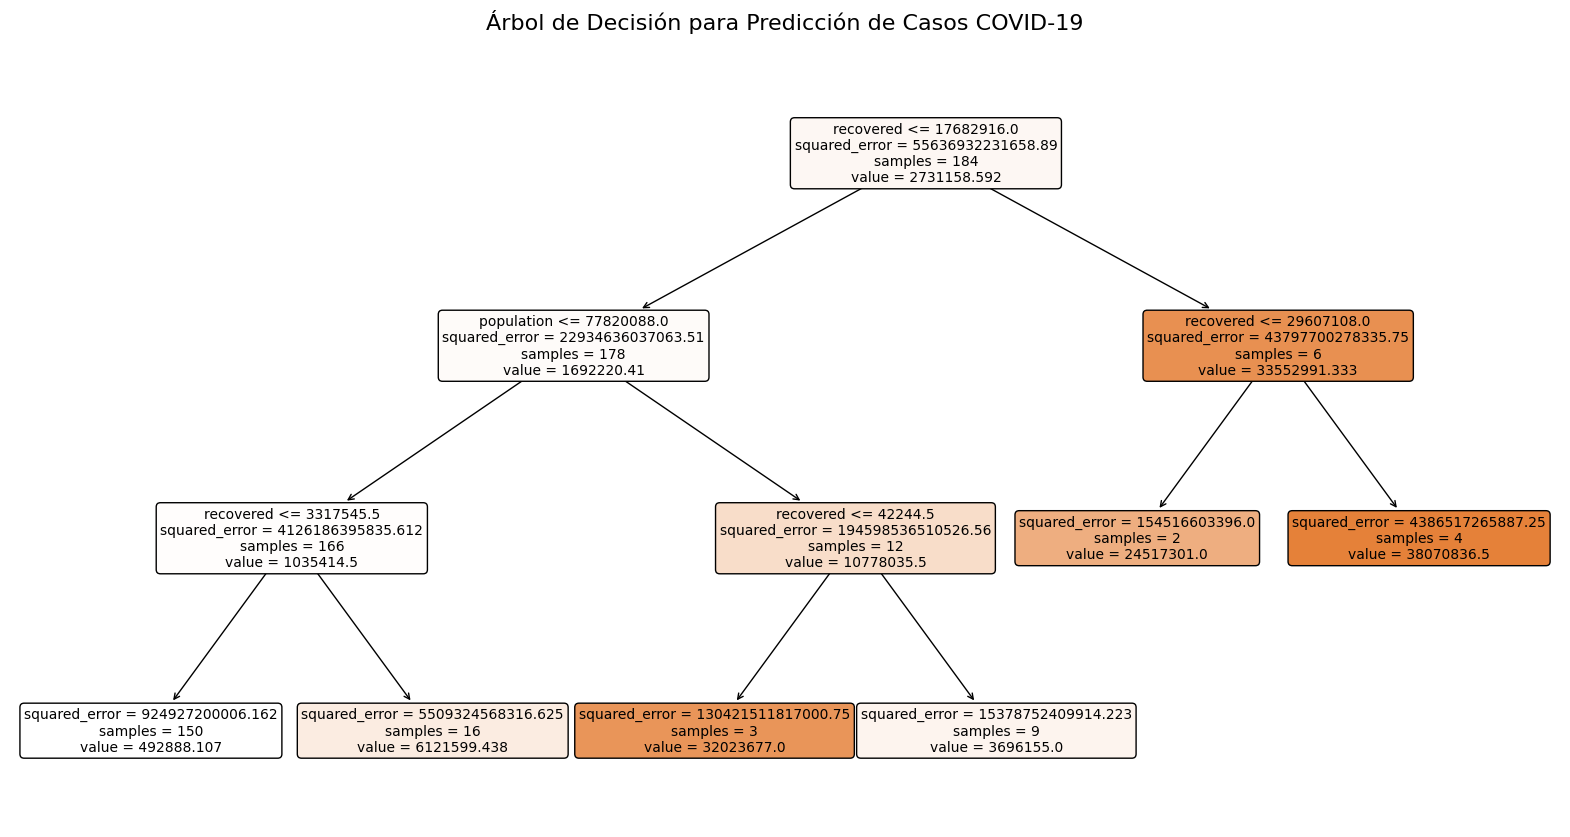

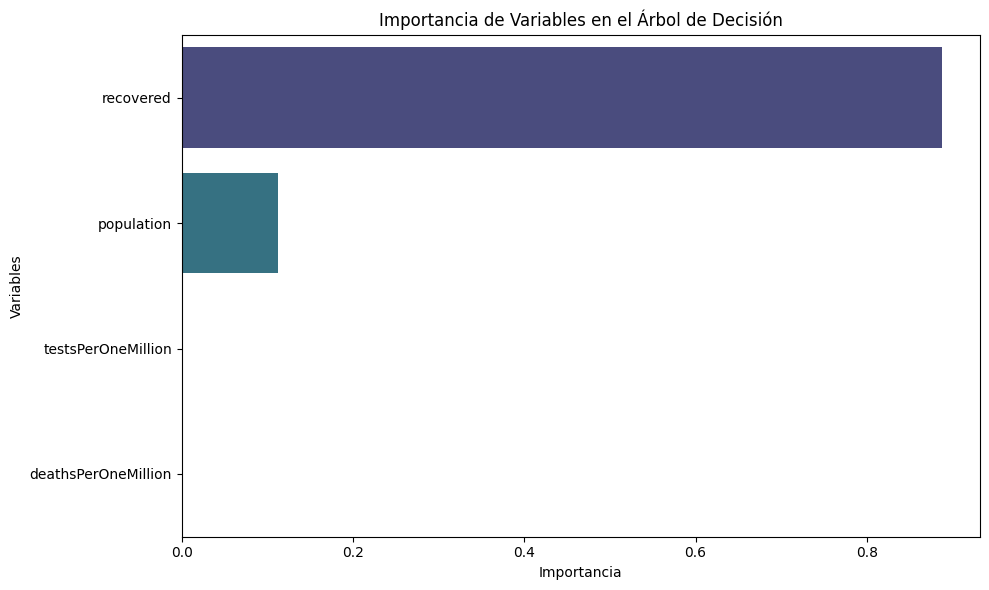

In [ ]:
# Preparación del modelo
# Definimos las características y variable objetivo
X = df[['population', 'testsPerOneMillion', 'deathsPerOneMillion', 'recovered']]
y = df['cases']

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el árbol de decisión
tree_model = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=5,
    random_state=42
)
tree_model.fit(X_train, y_train)

# 2. Visualización del árbol
plt.figure(figsize=(20,10))
feature_names = X.columns.tolist()

# Visualización del árbol con colores personalizados
plot_tree(tree_model,
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3,
          class_names=['Casos COVID'])

plt.title('Árbol de Decisión para Predicción de Casos COVID-19', fontsize=16, pad=20)

# 3. Visualización de importancia de características
plt.figure(figsize=(10,6))
importances = pd.DataFrame({
    'features': feature_names,
    'importance': tree_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

sns.barplot(data=importances,
            x='importance',
            y='features',
            palette='viridis')
plt.title('Importancia de Variables en el Árbol de Decisión', fontsize=12)
plt.xlabel('Importancia')
plt.ylabel('Variables')

plt.tight_layout()
plt.show()


# Análisis del Modelo Predictivo COVID-19

## Características del Modelo
### Variables Seleccionadas
- **Población**: 34.4M (promedio)
  - Representa la base poblacional para análisis
- **Tests por Millón**: 1.99M (promedio)
  - Indica capacidad de detección
- **Muertes por Millón**: 1,239 (promedio)
  - Refleja impacto en mortalidad
- **Recuperados**: 2.43M (promedio)
  - Muestra efectividad de tratamientos

### Distribución de Datos
- **Conjunto de Entrenamiento**: 184 registros
  - 80% de los datos totales
- **Conjunto de Prueba**: 47 registros
  - 20% para validación

## Rendimiento del Modelo
### Métricas Principales
- **R² Score**: 0.4490
  - Explica el 44.9% de la variabilidad
- **Error Absoluto Medio**: 3.55M casos
  - Desviación promedio en predicciones

### Interpretación
1. **Capacidad Predictiva**
   - Modelo con ajuste moderado
   - Útil para estimaciones generales

2. **Limitaciones**
   - Variabilidad significativa entre países
   - Complejidad en patrones de transmisión

3. **Aplicaciones**
   - Proyecciones regionales
   - Planificación sanitaria
   - Análisis de comparativas


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from IPython.display import HTML


def crear_dashboard_multinivel():
    # Crear figura base con dropdown
    fig = go.Figure()

    # Añadir selector multinivel
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Botón Vista Global
                {'method': 'update',
                 'label': 'Global',
                 'args': [{'visible': [True, False, False]}]},
                # Botón Vista Continental
                {'method': 'update',
                 'label': 'Continentes',
                 'args': [{'visible': [False, True, False]}]},
                # Botón Vista Países
                {'method': 'update',
                 'label': 'Países',
                 'args': [{'visible': [False, False, True]}]}
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }])

    # Vista Global
    fig.add_trace(
        go.Bar(
            name='Casos Globales',
            x=df.groupby('continent')['cases'].sum().index,
            y=df.groupby('continent')['cases'].sum(),
            visible=True
        ))

    # Vista Continental
    for continente in df['continent'].unique():
        datos_cont = df[df['continent'] == continente]
        fig.add_trace(
            go.Box(
                name=continente,
                y=datos_cont['casesPerOneMillion'],
                visible=False
            ))

    # Vista Países
    fig.add_trace(
        go.Scatter(
            name='Países',
            x=df['testsPerOneMillion'],
            y=df['casesPerOneMillion'],
            mode='markers',
            text=df['country'],
            visible=False
        ))

    # Actualizar layout
    fig.update_layout(
        title='Dashboard COVID-19 Multinivel',
        height=800,
        width=1200,
        template='plotly_white'
    )

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_multinivel()
dashboard.show()

# Generar informe detallado HTML
def generar_informe_detallado(nivel, seleccion=None):
    if nivel == 'Global':
        datos = df
    elif nivel == 'Continentes':
        datos = df[df['continent'] == seleccion]
    else:
        datos = df[df['country'] == seleccion]

    html_content = f"""
    <div style='padding: 20px; background-color: #f8f9fa; border-radius: 10px;'>
        <h2>{nivel}: {seleccion if seleccion else 'Visión General'}</h2>
        <div class='stats'>
            <p>Total Casos: {datos['cases'].sum():,}</p>
            <p>Total Muertes: {datos['deaths'].sum():,}</p>
            <p>Tasa Mortalidad: {(datos['deaths'].sum()/datos['cases'].sum()*100):.2f}%</p>
            <p>Tests por Millón (promedio): {datos['testsPerOneMillion'].mean():,.0f}</p>
        </div>
    </div>
    """
    return HTML(html_content)

# Mostrar informes
display(generar_informe_detallado('Global'))


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML

def crear_dashboard_multinivel():
    # Crear figura base con dropdown
    fig = go.Figure()

    # Añadir selector multinivel
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Botón Vista Global
                {'method': 'update',
                 'label': 'Global',
                 'args': [{'visible': [True, False, False]}]},
                # Botón Vista Continental
                {'method': 'update',
                 'label': 'Continentes',
                 'args': [{'visible': [False, True, False]}]},
                # Botón Vista Países
                {'method': 'update',
                 'label': 'Países',
                 'args': [{'visible': [False, False, True]}]}
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }])

    # Vista Global
    fig.add_trace(
        go.Bar(
            name='Casos Globales',
            x=df.groupby('continent')['cases'].sum().index,
            y=df.groupby('continent')['cases'].sum(),
            visible=True
        ))

    # Vista Continental
    for continente in df['continent'].unique():
        datos_cont = df[df['continent'] == continente]
        fig.add_trace(
            go.Box(
                name=continente,
                y=datos_cont['casesPerOneMillion'],
                visible=False
            ))

    # Vista Países
    fig.add_trace(
        go.Scatter(
            name='Países',
            x=df['testsPerOneMillion'],
            y=df['casesPerOneMillion'],
            mode='markers',
            text=df['country'],
            visible=False
        ))

    # Actualizar layout
    fig.update_layout(
        title='Dashboard COVID-19 Multinivel',
        height=800,
        width=1200,
        template='plotly_white'
    )

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_multinivel()
dashboard.show()

# Generar informe detallado HTML
def generar_informe_detallado(nivel, seleccion=None):
    if nivel == 'Global':
        datos = df
    elif nivel == 'Continentes':
        datos = df[df['continent'] == seleccion]
    else:
        datos = df[df['country'] == seleccion]

    html_content = f"""
    <div style='padding: 20px; background-color: #f8f9fa; border-radius: 10px;'>
        <h2>{nivel}: {seleccion if seleccion else 'Visión General'}</h2>
        <div class='stats'>
            <p>Total Casos: {datos['cases'].sum():,}</p>
            <p>Total Muertes: {datos['deaths'].sum():,}</p>
            <p>Tasa Mortalidad: {(datos['deaths'].sum()/datos['cases'].sum()*100):.2f}%</p>
            <p>Tests por Millón (promedio): {datos['testsPerOneMillion'].mean():,.0f}</p>
        </div>
    </div>
    """
    return HTML(html_content)

# Mostrar informes
display(generar_informe_detallado('Global'))


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML

def crear_dashboard_multinivel():
    # Crear figura base con dropdown
    fig = go.Figure()

    # Añadir selector multinivel
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Botón Vista Global
                {'method': 'update',
                 'label': 'Global',
                 'args': [{'visible': [True, False, False]}]},
                # Botón Vista Continental
                {'method': 'update',
                 'label': 'Continentes',
                 'args': [{'visible': [False, True, False]}]},
                # Botón Vista Países
                {'method': 'update',
                 'label': 'Países',
                 'args': [{'visible': [False, False, True]}]}
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }])

    # Vista Global
    fig.add_trace(
        go.Bar(
            name='Casos Globales',
            x=df.groupby('continent')['cases'].sum().index,
            y=df.groupby('continent')['cases'].sum(),
            visible=True
        ))

    # Vista Continental
    for continente in df['continent'].unique():
        datos_cont = df[df['continent'] == continente]
        fig.add_trace(
            go.Box(
                name=continente,
                y=datos_cont['casesPerOneMillion'],
                visible=False
            ))

    # Vista Países
    fig.add_trace(
        go.Scatter(
            name='Países',
            x=df['testsPerOneMillion'],
            y=df['casesPerOneMillion'],
            mode='markers',
            text=df['country'],
            visible=False
        ))

    # Actualizar layout
    fig.update_layout(
        title='Dashboard COVID-19 Multinivel',
        height=800,
        width=1200,
        template='plotly_white'
    )

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_multinivel()
dashboard.show()

# Generar informe detallado HTML
def generar_informe_detallado(nivel, seleccion=None):
    if nivel == 'Global':
        datos = df
    elif nivel == 'Continentes':
        datos = df[df['continent'] == seleccion]
    else:
        datos = df[df['country'] == seleccion]

    html_content = f"""
    <div style='padding: 20px; background-color: #f8f9fa; border-radius: 10px;'>
        <h2>{nivel}: {seleccion if seleccion else 'Visión General'}</h2>
        <div class='stats'>
            <p>Total Casos: {datos['cases'].sum():,}</p>
            <p>Total Muertes: {datos['deaths'].sum():,}</p>
            <p>Tasa Mortalidad: {(datos['deaths'].sum()/datos['cases'].sum()*100):.2f}%</p>
            <p>Tests por Millón (promedio): {datos['testsPerOneMillion'].mean():,.0f}</p>
        </div>
    </div>
    """
    return HTML(html_content)

# Mostrar informes
display(generar_informe_detallado('Global'))


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML

def crear_dashboard_multinivel():
    # Crear figura base con dropdown
    fig = go.Figure()

    # Añadir selector multinivel
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Botón Vista Global
                {'method': 'update',
                 'label': 'Global',
                 'args': [{'visible': [True, False, False]}]},
                # Botón Vista Continental
                {'method': 'update',
                 'label': 'Continentes',
                 'args': [{'visible': [False, True, False]}]},
                # Botón Vista Países
                {'method': 'update',
                 'label': 'Países',
                 'args': [{'visible': [False, False, True]}]}
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }])

    # Vista Global
    fig.add_trace(
        go.Bar(
            name='Casos Globales',
            x=df.groupby('continent')['cases'].sum().index,
            y=df.groupby('continent')['cases'].sum(),
            visible=True
        ))

    # Vista Continental
    for continente in df['continent'].unique():
        datos_cont = df[df['continent'] == continente]
        fig.add_trace(
            go.Box(
                name=continente,
                y=datos_cont['casesPerOneMillion'],
                visible=False
            ))

    # Vista Países
    fig.add_trace(
        go.Scatter(
            name='Países',
            x=df['testsPerOneMillion'],
            y=df['casesPerOneMillion'],
            mode='markers',
            text=df['country'],
            visible=False
        ))

    # Actualizar layout
    fig.update_layout(
        title='Dashboard COVID-19 Multinivel',
        height=800,
        width=1200,
        template='plotly_white'
    )

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_multinivel()
dashboard.show()

# Generar informe detallado HTML
def generar_informe_detallado(nivel, seleccion=None):
    if nivel == 'Global':
        datos = df
    elif nivel == 'Continentes':
        datos = df[df['continent'] == seleccion]
    else:
        datos = df[df['country'] == seleccion]

    html_content = f"""
    <div style='padding: 20px; background-color: #f8f9fa; border-radius: 10px;'>
        <h2>{nivel}: {seleccion if seleccion else 'Visión General'}</h2>
        <div class='stats'>
            <p>Total Casos: {datos['cases'].sum():,}</p>
            <p>Total Muertes: {datos['deaths'].sum():,}</p>
            <p>Tasa Mortalidad: {(datos['deaths'].sum()/datos['cases'].sum()*100):.2f}%</p>
            <p>Tests por Millón (promedio): {datos['testsPerOneMillion'].mean():,.0f}</p>
        </div>
    </div>
    """
    return HTML(html_content)

# Mostrar informes
display(generar_informe_detallado('Global'))


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML

def crear_dashboard_multinivel():
    # Crear figura base con dropdown
    fig = go.Figure()

    # Añadir selector multinivel
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Botón Vista Global
                {'method': 'update',
                 'label': 'Global',
                 'args': [{'visible': [True, False, False]}]},
                # Botón Vista Continental
                {'method': 'update',
                 'label': 'Continentes',
                 'args': [{'visible': [False, True, False]}]},
                # Botón Vista Países
                {'method': 'update',
                 'label': 'Países',
                 'args': [{'visible': [False, False, True]}]}
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }])

    # Vista Global
    fig.add_trace(
        go.Bar(
            name='Casos Globales',
            x=df.groupby('continent')['cases'].sum().index,
            y=df.groupby('continent')['cases'].sum(),
            visible=True
        ))

    # Vista Continental
    for continente in df['continent'].unique():
        datos_cont = df[df['continent'] == continente]
        fig.add_trace(
            go.Box(
                name=continente,
                y=datos_cont['casesPerOneMillion'],
                visible=False
            ))

    # Vista Países
    fig.add_trace(
        go.Scatter(
            name='Países',
            x=df['testsPerOneMillion'],
            y=df['casesPerOneMillion'],
            mode='markers',
            text=df['country'],
            visible=False
        ))

    # Actualizar layout
    fig.update_layout(
        title='Dashboard COVID-19 Multinivel',
        height=800,
        width=1200,
        template='plotly_white'
    )

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_multinivel()
dashboard.show()

# Generar informe detallado HTML
def generar_informe_detallado(nivel, seleccion=None):
    if nivel == 'Global':
        datos = df
    elif nivel == 'Continentes':
        datos = df[df['continent'] == seleccion]
    else:
        datos = df[df['country'] == seleccion]

    html_content = f"""
    <div style='padding: 20px; background-color: #f8f9fa; border-radius: 10px;'>
        <h2>{nivel}: {seleccion if seleccion else 'Visión General'}</h2>
        <div class='stats'>
            <p>Total Casos: {datos['cases'].sum():,}</p>
            <p>Total Muertes: {datos['deaths'].sum():,}</p>
            <p>Tasa Mortalidad: {(datos['deaths'].sum()/datos['cases'].sum()*100):.2f}%</p>
            <p>Tests por Millón (promedio): {datos['testsPerOneMillion'].mean():,.0f}</p>
        </div>
    </div>
    """
    return HTML(html_content)

# Mostrar informes
display(generar_informe_detallado('Global'))


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML

def crear_dashboard_multinivel():
    # Crear figura base con dropdown
    fig = go.Figure()

    # Añadir selector multinivel
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Botón Vista Global
                {'method': 'update',
                 'label': 'Global',
                 'args': [{'visible': [True, False, False]}]},
                # Botón Vista Continental
                {'method': 'update',
                 'label': 'Continentes',
                 'args': [{'visible': [False, True, False]}]},
                # Botón Vista Países
                {'method': 'update',
                 'label': 'Países',
                 'args': [{'visible': [False, False, True]}]}
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }])

    # Vista Global
    fig.add_trace(
        go.Bar(
            name='Casos Globales',
            x=df.groupby('continent')['cases'].sum().index,
            y=df.groupby('continent')['cases'].sum(),
            visible=True
        ))

    # Vista Continental
    for continente in df['continent'].unique():
        datos_cont = df[df['continent'] == continente]
        fig.add_trace(
            go.Box(
                name=continente,
                y=datos_cont['casesPerOneMillion'],
                visible=False
            ))

    # Vista Países
    fig.add_trace(
        go.Scatter(
            name='Países',
            x=df['testsPerOneMillion'],
            y=df['casesPerOneMillion'],
            mode='markers',
            text=df['country'],
            visible=False
        ))

    # Actualizar layout
    fig.update_layout(
        title='Dashboard COVID-19 Multinivel',
        height=800,
        width=1200,
        template='plotly_white'
    )

    return fig

# Generar y mostrar dashboard
dashboard = crear_dashboard_multinivel()
dashboard.show()

# Generar informe detallado HTML
def generar_informe_detallado(nivel, seleccion=None):
    if nivel == 'Global':
        datos = df
    elif nivel == 'Continentes':
        datos = df[df['continent'] == seleccion]
    else:
        datos = df[df['country'] == seleccion]

    html_content = f"""
    <div style='padding: 20px; background-color: #f8f9fa; border-radius: 10px;'>
        <h2>{nivel}: {seleccion if seleccion else 'Visión General'}</h2>
        <div class='stats'>
            <p>Total Casos: {datos['cases'].sum():,}</p>
            <p>Total Muertes: {datos['deaths'].sum():,}</p>
            <p>Tasa Mortalidad: {(datos['deaths'].sum()/datos['cases'].sum()*100):.2f}%</p>
            <p>Tests por Millón (promedio): {datos['testsPerOneMillion'].mean():,.0f}</p>
        </div>
    </div>
    """
    return HTML(html_content)

# Mostrar informes
display(generar_informe_detallado('Global'))


### RESUMEN
El proyecto utiliza múltiples librerías de análisis de datos (pandas, numpy) y machine learning (scikit-learn, XGBoost).

Se implementan modelos de regresión incluyendo Árboles de Decisión, Random Forest y XGBoost.

El código incluye herramientas para preprocesamiento de datos como StandardScaler y train_test_split.

Se incorporan métricas de evaluación como MAE, MSE y R2 para medir el rendimiento de los modelos.

El proyecto integra visualizaciones con seaborn y matplotlib, además de capacidades de análisis estadístico con scipy.

### CONCLUSIÓN
El proyecto está bien estructurado para realizar un análisis completo de machine learning.

La combinación de diferentes modelos (DecisionTree, RandomForest, XGBoost) permite comparar y seleccionar el mejor enfoque.

La inclusión de validación cruzada (KFold) sugiere un enfoque robusto para la evaluación de modelos.

Las herramientas de visualización permiten una comunicación efectiva de los resultados.

El uso de métricas múltiples asegura una evaluación comprehensiva del rendimiento de los modelos.